In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Predicción de géneros musicales 

### Índice
1. Normalización y categorización
2. Configuración de los entrenamientos
3. Entrenamiento de modelos
4. Evaluación de modelos

### 1. Normalización y categorización

Ya tenemos un dataset limpio y preprocesado practicamente listo para ser utilizado. Sin embargo, antes de poder entrenar un modelo de clasificación, necesitamos normalizar los datos y categorizar las etiquetas de los géneros musicales. Para ello, utilizaremos la función `LabelEncoder` de la librería `sklearn` como método de categorización de etiquetas y `min max scaler` para normalizar los datos.

Para comenzar, cargamos el dataset.

In [2]:
music_df = pd.read_csv('unique_non_null_music_genre.csv')
print(music_df.head())
print(music_df.dtypes)

   instance_id           artist_name  ... valence  music_genre
0      32894.0              Röyksopp  ...   0.759   Electronic
1      46652.0  Thievery Corporation  ...   0.531   Electronic
2      30097.0        Dillon Francis  ...   0.333   Electronic
3      62177.0              Dubloadz  ...   0.270   Electronic
4      24907.0           What So Not  ...   0.323   Electronic

[5 rows x 17 columns]
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object


Realizamos la transformaciones comentadas.

In [3]:
# We have to normalize the data and categorize all non-numeric data
numeric_cols = music_df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('instance_id', errors='ignore')

categorical_cols = music_df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['artist_name', 'track_name'], errors='ignore')

music_df[numeric_cols] = (music_df[numeric_cols] - music_df[numeric_cols].min()) / (music_df[numeric_cols].max() - music_df[numeric_cols].min())

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    music_df[col] = le.fit_transform(music_df[col])
    label_encoders[col] = le

print(music_df.head())
print(music_df.dtypes)

   instance_id           artist_name  ...   valence  music_genre
0      32894.0              Röyksopp  ...  0.765121           10
1      46652.0  Thievery Corporation  ...  0.535282           10
2      30097.0        Dillon Francis  ...  0.335685           10
3      62177.0              Dubloadz  ...  0.272177           10
4      24907.0           What So Not  ...  0.325605           10

[5 rows x 17 columns]
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
dtype: object


### 2. Configuración de los entrenamientos


Para la configuración de entrenamientos, usamos como features únicamente las columnas que queremos que sean utilizadas para la predicción. En este caso, utilizamos todas las columnas excepto la columna `music_genre` y aquellas columnas que no aportan información relevante para la predicción como `instance_id`, `artist_name` y `track_name`.

Como target, utilizamos la columna `music_genre` que es la que queremos predecir.

Finalmente, hemos decidido usar `KFold` como método de validación cruzada para evaluar el rendimiento del modelo. Divido el dataset en 5 partes. Se decide usar 5 partes ya que tenemos un dataset con un tamaño considerable, esto es equivalente a tener un 80% de los datos para entrenamiento y un 20% para validación.

In [4]:
# We have to split the data into features and target and use K-Fold cross validation
features = music_df.drop(columns=['instance_id', 'artist_name', 'track_name', 'music_genre'], errors='ignore')
target = music_df['music_genre']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Los modelos que se van a probar son los siguientes:
- Regresión logística
- SVM
- Arbol de decisión
- Random Forest
- Gradient Boosting
- KNN
- Naive Bayes

Todos ellos usando la implementación de `sklearn`.

In [5]:
# We define the models we want to use
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GBoost': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB()
}

### 3. Generación de modelos y métricas

Para cada modelo, se entrena usando las features y el target que comentamos anteriormente, haciendo uso de la validación cruzada definida. Guardamos los resultados para poder compararlos posteriormente.

In [6]:
# Train models and get predictions
predictions = {}

for model_name, model in tqdm(models.items(), desc="Training Models"):
    print(f'Training {model_name}...')
    pred = cross_val_predict(model, features, target, cv=kf)
    predictions[model_name] = pred

print('Done training!')

Training Models:   0%|          | 0/7 [00:00<?, ?it/s]

Training Logistic Regression...


Training Models:  14%|█▍        | 1/7 [00:51<05:09, 51.66s/it]

Training SVM...


Training Models:  29%|██▊       | 2/7 [04:55<13:42, 164.60s/it]

Training Decision Tree...


Training Models:  43%|████▎     | 3/7 [04:58<06:03, 90.97s/it] 

Training Random Forest...


Training Models:  57%|█████▋    | 4/7 [05:54<03:50, 76.98s/it]

Training GBoost...


Training Models:  71%|███████▏  | 5/7 [19:40<11:34, 347.32s/it]

Training KNN...


Training Models: 100%|██████████| 7/7 [19:44<00:00, 169.15s/it]

Training Naive Bayes...
Done training!


### 4. Evaluación de modelos
Una vez se han entrenado todos los modelos, se evalúan los resultados obtenidos. Se comparan los resultados de cada modelo y se hace un estudio de cual ha tenido mejor rendimiento. Para ello se comienza con un estudio visual mediante la representación de la matriz de confusión + accuracy. Posteriormente se entrará más en detalle con distintas métricas.

#### 4.1 Matriz de confusión
Definimos una función para que represente la matriz de confusión como un heatmap, normalizado entre 0 y 1 para poder comparar los resultados de cada género sin importar el número de instancias que haya de cada uno. Este tipo de gráfica nos aportará información valiosa ya que se puede ver de forma muy sencilla si el modelo está prediciendo correctamente los géneros, mirando el color de la diagonal principal.

In [17]:
class_names = label_encoders['music_genre'].classes_

def get_metrics(target, predictions, model_name):
    conf_matrix = confusion_matrix(target, predictions[model_name])
    accuracy = accuracy_score(target, predictions[model_name])

    # Normalize the confusion matrix
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Accuracy of the model
    print(f'{model_name} - Accuracy: {accuracy}')

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix (Normalized) for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Ahora para cada modelo, se representará la matriz de confusión.

Logistic Regression - Accuracy: 0.5097184178810124


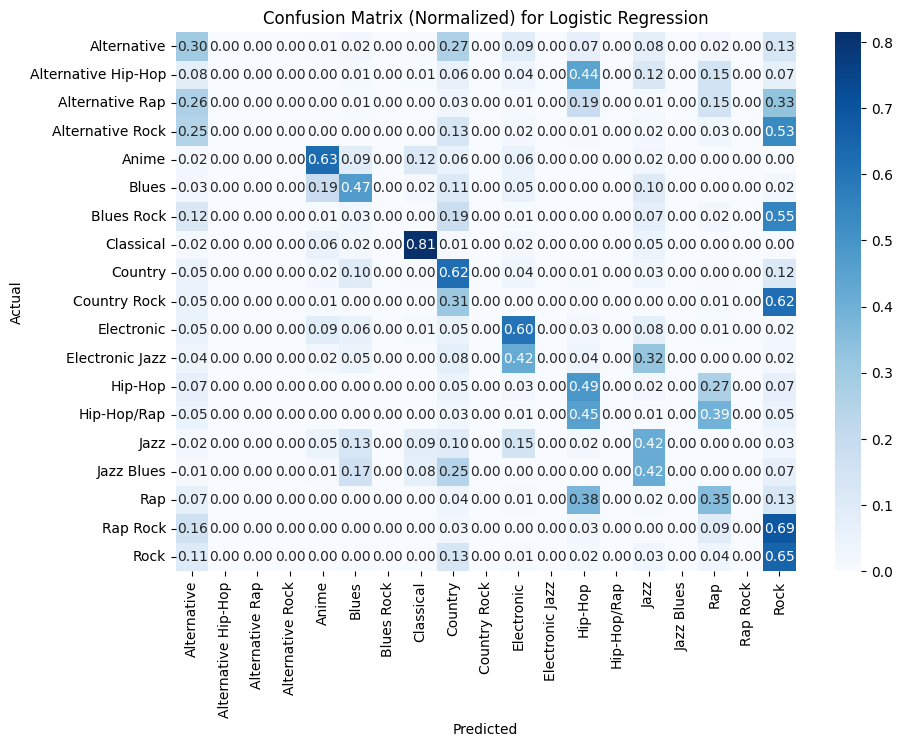

In [8]:
# Logistic Regression metrics
get_metrics(target, predictions, 'Logistic Regression')

SVM - Accuracy: 0.4876739344801139


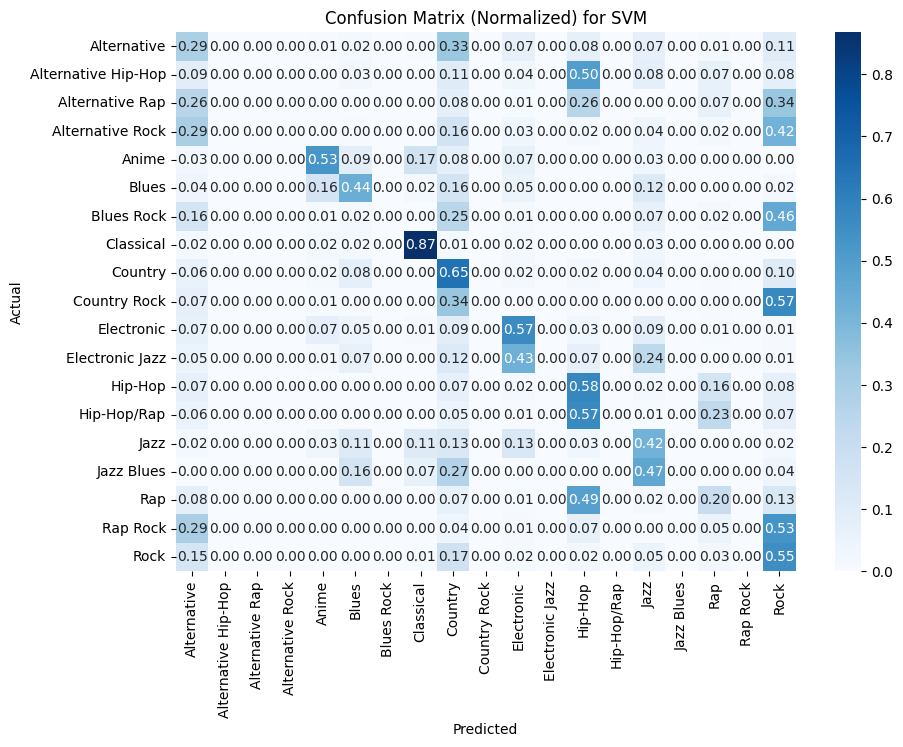

In [9]:
# SVM metrics
get_metrics(target, predictions, 'SVM')

Decision Tree - Accuracy: 0.44137175413607976


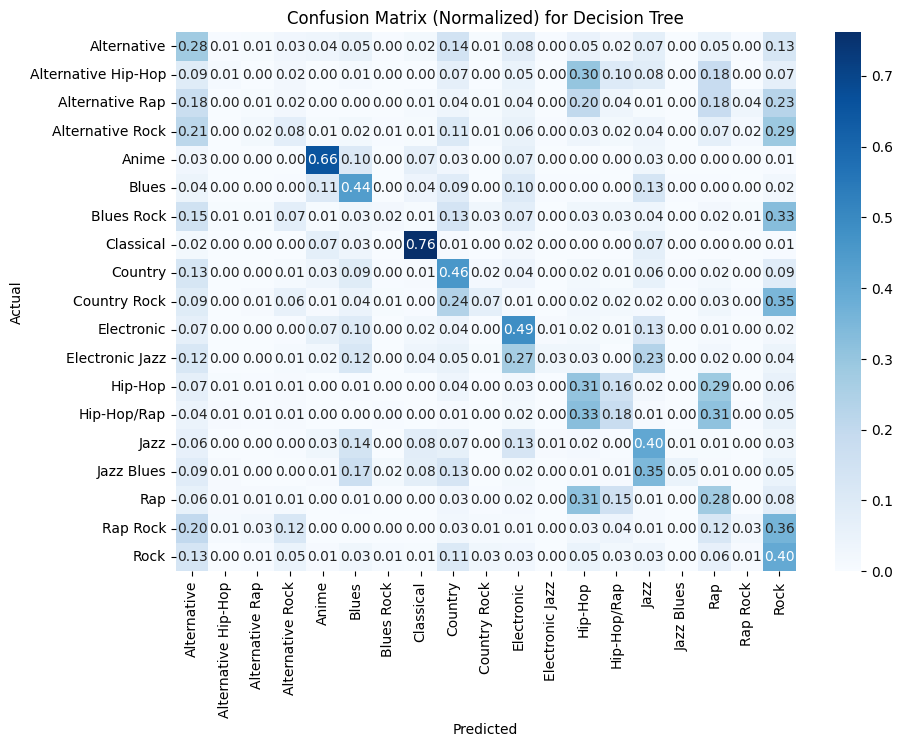

In [10]:
# Decision Tree metrics
get_metrics(target, predictions, 'Decision Tree')

Random Forest - Accuracy: 0.5738577845951572


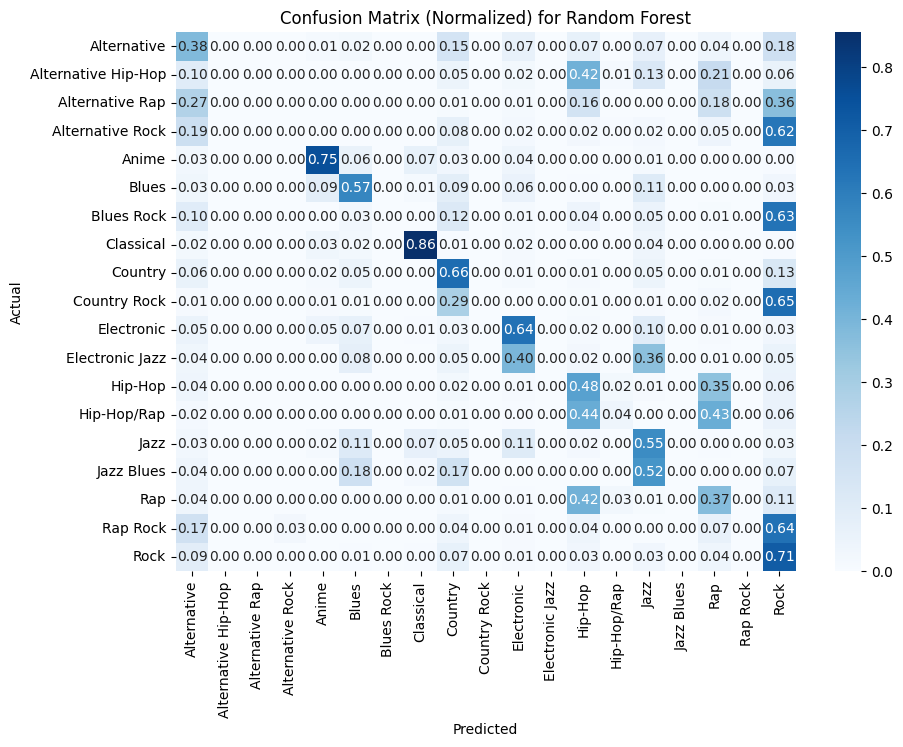

In [11]:
# Random Forest metrics
get_metrics(target, predictions, 'Random Forest')

GBoost - Accuracy: 0.5739673496220007


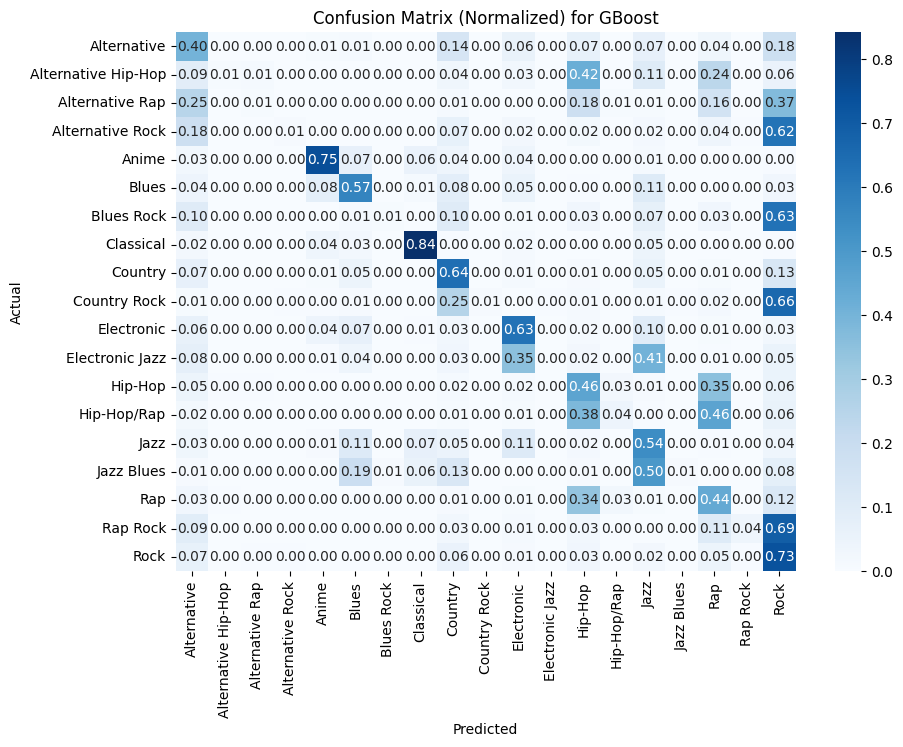

In [12]:
# Gradient Boosting metrics
get_metrics(target, predictions, 'GBoost')

KNN - Accuracy: 0.42344691574449433


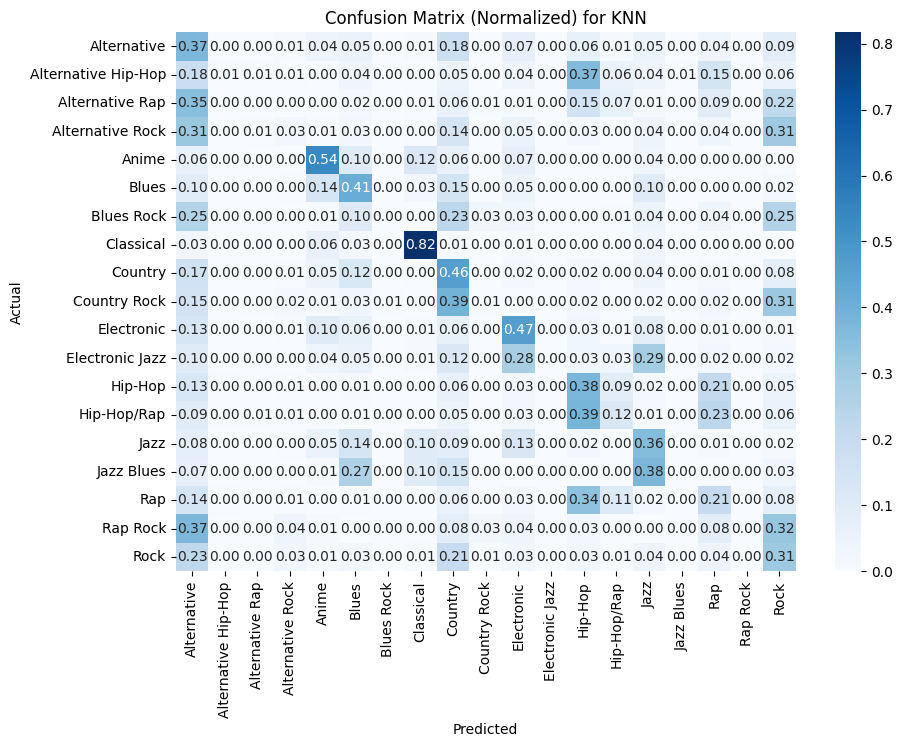

In [46]:
# KNN metrics
get_metrics(target, predictions, 'KNN')

Naive Bayes - Accuracy: 0.30816259449983563


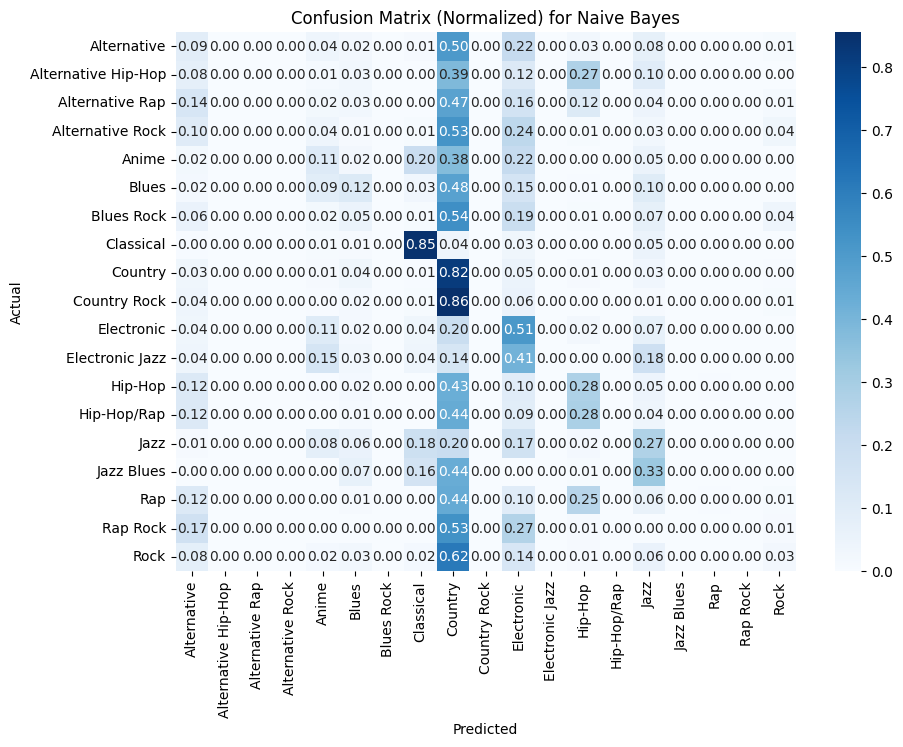

In [14]:
# Naive Bayes metrics
get_metrics(target, predictions, 'Naive Bayes')

De un vistazo podemos observar que los mejores modelos son Random Forest y Gradient Boosting, ya que su accuracy es de 0.576 y 0.573 respectivamente. A simple vista parece un resultado bastante pobre, pero hay que tener en cuenta que estamos clasificando 19 géneros musicales. Además la tarea de clasificación de géneros musicales es bastante complicada ya que no es una ciencia exacta.

Hay que tener en cuenta que los datos con los que estamos trabajando no dan información típica para clasificar géneros musicales y la mayor parte de la información es subjetiva y generada por ia.

Dejando de lado este apunte, queremos mencionar que hay subgéneros que a pesar de haber sido clasificados 'incorrectamente' tienen una relación muy estrecha con el género original. Esto se puede ver sobre todo en aquellos subgéneros del rock, como el Rap Rock, Country Rock, Alternative Rock y Blues Rock, que en lugar de clasificarse en su subgénero concreto han sido clasificados en el género Rock, lo cual no podríamos considerar erróneo. Algo parecido ocurre con el Hip Hop y el Rap, y sus subgéneros, que han sido clasificados a partes iguales entre Hip Hop y Rap, lo cual también es en parte correcto. Tambien se puede ver con otros casos de género-subgénero como el jazz y el electronic jazz.

Los géneros que más facilmente han sido predichos son la música clásica, rock y anime de forma generalizada, mientra que por ejemplo el género el alternative ha sido más difuso de clasificar. Nuestra percepción es que este género es muy amplio y puede abarcar características de otros géneros, lo cual puede haber dificultado su clasificación. A pesar de ello, el modelo ha sido capaz de clasificar correctamente un 40% de las instancias de este género, usando el modelo gradient boosting.

In [51]:
# We calculate f1 score for each model
classification_reports = {}
for model_name in models.keys():
    print(f'{model_name} - Classification Report:')
    classification_reports[model_name] = classification_report(target, predictions[model_name], target_names=class_names, zero_division=0)
    print(classification_reports[model_name])

Logistic Regression - Classification Report:
                     precision    recall  f1-score   support

        Alternative       0.36      0.30      0.33      3878
Alternative Hip-Hop       0.00      0.00      0.00       142
    Alternative Rap       0.00      0.00      0.00       137
   Alternative Rock       0.00      0.00      0.00       540
              Anime       0.61      0.63      0.62      4954
              Blues       0.52      0.47      0.49      4651
         Blues Rock       0.00      0.00      0.00       134
          Classical       0.77      0.81      0.79      4936
            Country       0.43      0.62      0.51      4547
       Country Rock       0.00      0.00      0.00       291
         Electronic       0.57      0.60      0.59      4783
    Electronic Jazz       0.00      0.00      0.00       167
            Hip-Hop       0.38      0.49      0.43      3225
        Hip-Hop/Rap       0.00      0.00      0.00      1521
               Jazz       0.49      0.4

In [54]:
# We split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 36508
Testing set size: 9127


In [55]:
# We train Random Forest and Gradient Boosting models on the training set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
# We analyze the feature importance of both models
rf_feature_importance = rf.feature_importances_
xgb_feature_importance = xgb.feature_importances_

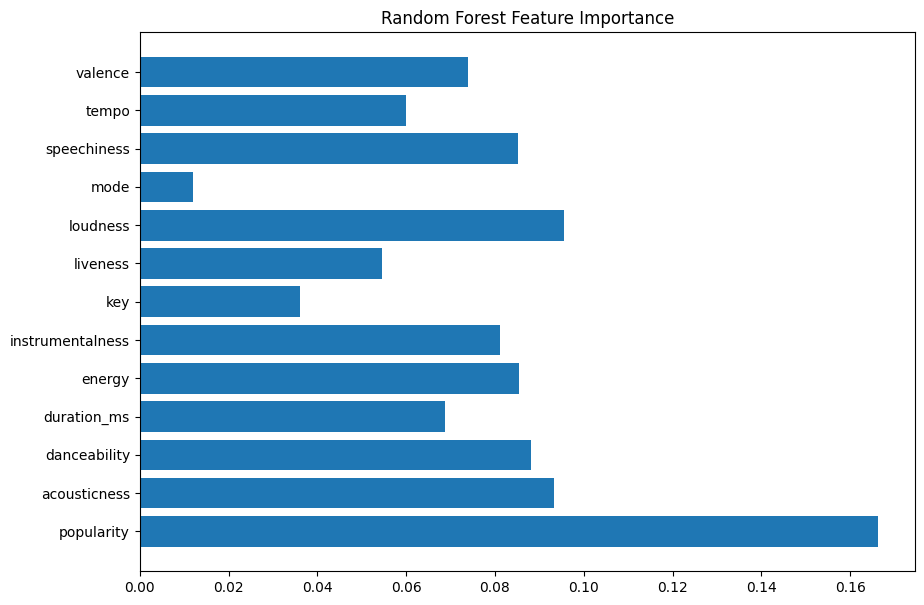

In [58]:
# We plot the feature importance of both models
plt.figure(figsize=(10, 7))
plt.barh(features.columns, rf_feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

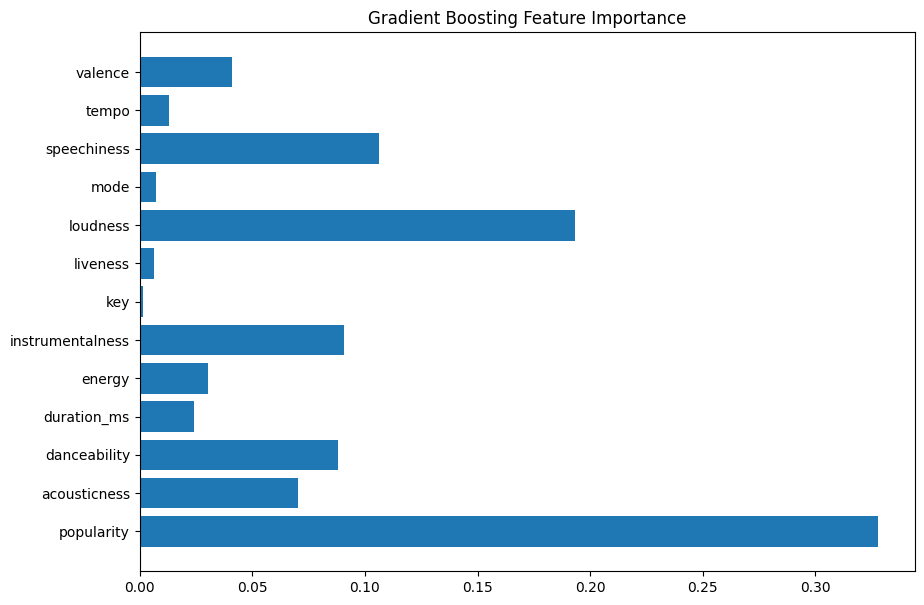

In [59]:
# We plot the feature importance of Gradient Boosting
plt.figure(figsize=(10, 7))
plt.barh(features.columns, xgb_feature_importance)
plt.title('Gradient Boosting Feature Importance')
plt.show()